In [25]:
import pandas as pd
import seaborn as sns
import ydata_profiling
from ydata_profiling import ProfileReport
import matplotlib
from matplotlib import pyplot as plt
import wandb

%matplotlib inline

In [2]:
run = wandb.init(
  project="exercise_4",
  save_code=True
)

wandb: Currently logged in as: lejcruz (lejcruz-nubank). Use `wandb login --relogin` to force relogin


In [4]:
artifact = run.use_artifact("exercise_4/genres_mod.parquet:latest")
df = pd.read_parquet(artifact.file())
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,genre,song_name,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,124539,4,Dark Trap,Mercury: Retrograde,None
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,224427,4,Dark Trap,Pathology,None
2,0.850,0.893,5,NaN,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,98821,4,Dark Trap,Symbiote,None
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),None
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,123298,4,Dark Trap,Venom,None


In [5]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [6]:
df = df.drop_duplicates().reset_index(drop=True)

In [7]:
df['title'].fillna(value='', inplace=True)
df['song_name'].fillna(value='', inplace=True)
df['text_feature'] = df['title'] + ' ' + df['song_name']

/var/folders/04/chwb3n9s59j8f4451k4gvy800000gn/T/ipykernel_6110/668156440.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['title'].fillna(value='', inplace=True)
/var/folders/04/chwb3n9s59j8f4451k4gvy800000gn/T/ipykernel_6110/668156440.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

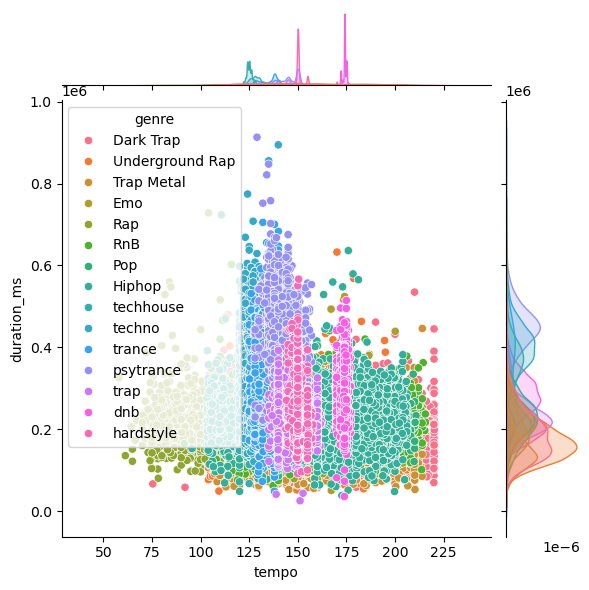

In [27]:
sns.jointplot(x=df['tempo'], y=df['duration_ms'], color="#4CB391", hue=df['genre'])

In [28]:
run.finish()